In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv(r"C:\Users\meena\OneDrive\Desktop\Project_data.csv")
data

,,Depression,Gender,Age,Marital_status,Household_size,Income,Asthma,Heart_Attack,Liver_Condition,...,Sleep_Hours,Platelet,Memory_Problems,Drinks_per_Occasion,ALT,AST,ALP,LHD,Iron,Sedentary_Time
0,31131,Not Depressed,1,44,Married,4,11,0,0,0,...,9.0,298,0,0,14,16,74,105,51,150
1,31132,Not Depressed,0,70,Married,2,11,0,0,0,...,7.0,225,0,1,31,29,48,165,89,150
2,31134,Not Depressed,0,73,Married,2,5,0,0,0,...,7.0,222,0,2,30,31,77,158,84,90
3,31139,Not Depressed,1,18,Never Married,3,11,1,0,0,...,6.0,0,0,0,0,0,0,0,0,120
4,31143,Not Depressed,0,19,Never Married,3,11,0,0,0,...,7.0,217,0,0,22,23,47,93,158,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36254,102949,Not Depressed,0,33,Partner,5,6,0,0,0,...,6.5,254,0,0,26,29,104,185,97,60
36255,102952,Not Depressed,1,70,Married,2,4,0,0,0,...,8.5,161,0,0,22,27,57,168,140,120
36256,102953,Not Depressed,0,42,Separated,1,5,1,0,0,...,6.0,227,0,12,40,29,115,136,70,360
36257,102954,Not Depressed,1,41,Never Married,7,10,0,0,0,...,8.0,145,0,0,6,15,55,123,20,600


In [3]:
data.describe()

,,Gender,Age,Household_size,Income,Asthma,Heart_Attack,Liver_Condition,Stroke,Pulse,...,Sleep_Hours,Platelet,Memory_Problems,Drinks_per_Occasion,ALT,AST,ALP,LHD,Iron,Sedentary_Time
count,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,...,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000,36259.000000
mean,67521.563805,0.508756,47.786260,3.206349,6.919358,0.147743,0.039825,0.020905,0.035412,71.286026,...,7.071830,238.210237,0.075457,1.820927,23.505557,23.904603,67.263162,125.867785,80.293527,330.840812
std,20832.294029,0.499930,18.763978,1.677450,3.523153,0.354850,0.195550,0.143069,0.184821,15.748265,...,1.570525,81.029135,0.264131,2.583304,20.128516,16.563453,29.467571,44.891645,39.717110,201.395358
min,31131.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49463.000000,0.000000,31.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,64.000000,...,6.000000,198.000000,0.000000,0.000000,15.000000,18.000000,53.000000,110.000000,57.000000,180.000000
50%,66902.000000,1.000000,47.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,72.000000,...,7.000000,238.000000,0.000000,1.000000,20.000000,22.000000,66.000000,127.000000,78.000000,300.000000
75%,85901.500000,1.000000,63.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,80.000000,...,8.000000,283.000000,0.000000,2.000000,27.000000,27.000000,81.000000,147.000000,103.000000,480.000000
max,102956.000000,1.000000,85.000000,7.000000,12.000000,1.000000,1.000000,1.000000,1.000000,224.000000,...,14.500000,1000.000000,1.000000,83.000000,1363.000000,882.000000,907.000000,1539.000000,476.000000,1320.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        36259 non-null  int64  
 1   Depression           36259 non-null  object 
 2   Gender               36259 non-null  int64  
 3   Age                  36259 non-null  int64  
 4   Marital_status       36259 non-null  object 
 5   Household_size       36259 non-null  int64  
 6   Income               36259 non-null  int64  
 7   Asthma               36259 non-null  int64  
 8   Heart_Attack         36259 non-null  int64  
 9   Liver_Condition      36259 non-null  int64  
 10  Stroke               36259 non-null  int64  
 11  Pulse                36259 non-null  int64  
 12  Systolic             36259 non-null  int64  
 13  Diastolic            36259 non-null  int64  
 14  Total_Cholesterol    36259 non-null  int64  
 15  Haemoglobin          36259 non-null 

In [5]:
data.value_counts("Depression")

Depression
Not Depressed    33091
Depressed         3168
dtype: int64

In [6]:
def converter(depress):
    if depress == "Not Depressed":
        return 0
    else:
        return 1
   
data['Depression'] =data['Depression'].apply(converter)


In [7]:
def convert(marriage):
    if marriage == "Married":
        return 0
    elif marriage == "Never Married":
        return 1
    elif marriage == "Divorced":
        return 2
    elif marriage == "Partner":
        return 3
    elif marriage == "Widowed":
        return 4
    elif marriage == "Missing":
        return 5
    else:
        return 6
data['Marital_status'] =data['Marital_status'].apply(convert)

In [8]:
data.value_counts("Depression")

Depression
0    33091
1     3168
dtype: int64

In [9]:
data.value_counts("Marital_status")

Marital_status
0    17574
1     6602
2     3751
3     2842
4     2695
5     1636
6     1159
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X = data.drop("Depression", axis=1)
y = data["Depression"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [11]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=0.7) 
                     
X_under_sample, y_under_sample = under.fit_resample(X_train, y_train)

In [12]:
y_under_sample.value_counts()

0    3217
1    2252
Name: Depression, dtype: int64

In [13]:
df = pd.concat([X_under_sample, y_under_sample], axis=1)

In [14]:
df["Marital_status"].value_counts()

0    2379
1    1043
2     715
3     432
4     425
6     242
5     233
Name: Marital_status, dtype: int64

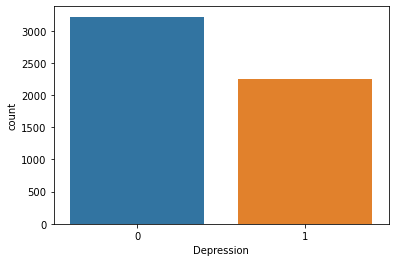

In [15]:
sns.countplot(data = df, x =  "Depression")
plt.show()

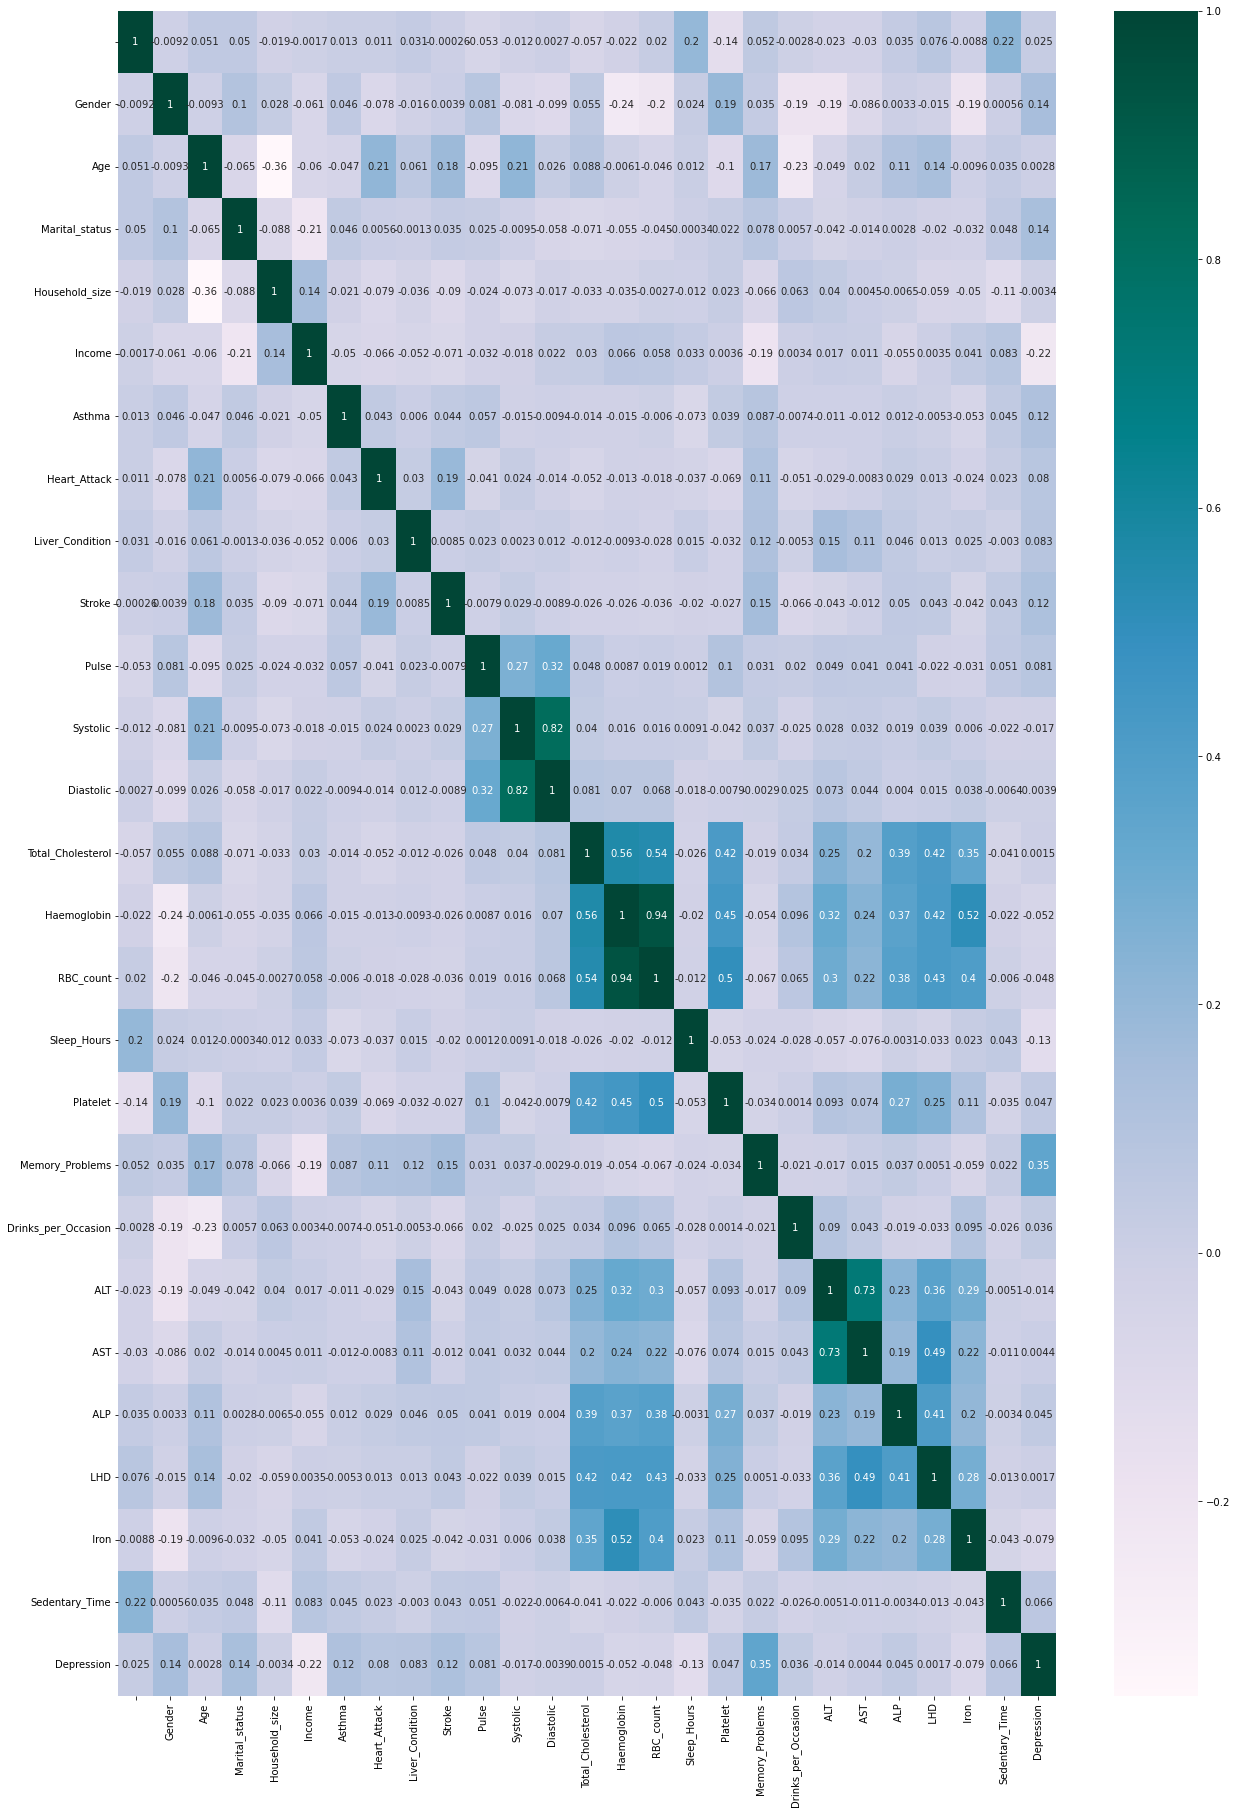

In [16]:
plt.figure(figsize= (21,31))
sns.heatmap(df.corr(), annot = True, cmap="PuBuGn")
plt.show()

C:\Users\meena\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


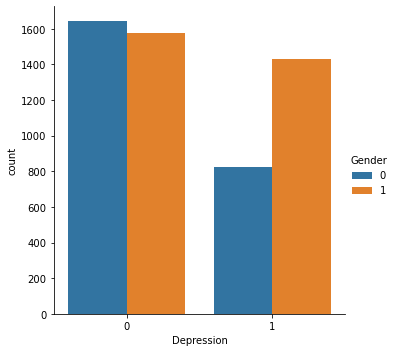

In [17]:
sns.factorplot(x = "Depression", data = df, kind = "count", hue = "Gender")
plt.show()

C:\Users\meena\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


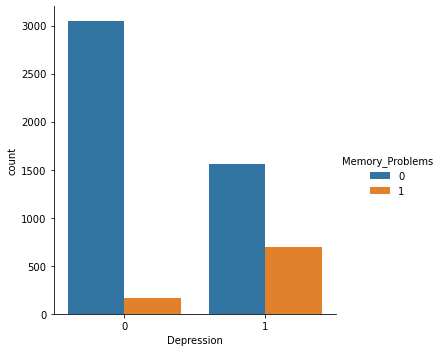

In [18]:
sns.factorplot(x = "Depression", data = df, kind = "count", hue = "Memory_Problems")
plt.show()

C:\Users\meena\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


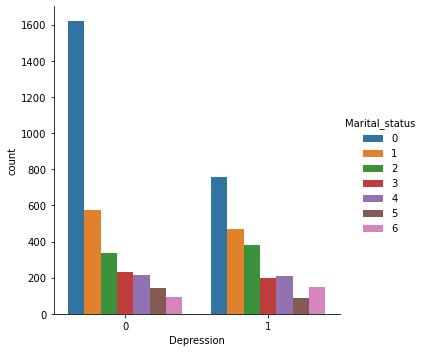

In [19]:
sns.factorplot(x="Depression", data = df, kind = "count", hue = "Marital_status")
plt.show()

In [20]:
!pip install imblearn

In [36]:
dt = DecisionTreeClassifier(criterion = 'entropy')

In [37]:
dt.fit(X_under_sample, y_under_sample)

DecisionTreeClassifier(criterion='entropy')

In [38]:
y_pred = dt.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [40]:
print( accuracy_score(y_test, y_pred))

0.6640007354293068


In [41]:
print( precision_score(y_test, y_pred, average = "weighted"))

0.8702003956276575


In [42]:
print("f1 score:", f1_score(y_test, y_pred))

f1 score: 0.20560747663551399


In [43]:
print("Recall Score:", recall_score(y_test, y_pred))

Recall Score: 0.5163755458515283


In [44]:
print(confusion_matrix(y_test, y_pred))

[[6750 3212]
 [ 443  473]]
